In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

## Problem statment

## Data gathering

In [2]:
df=pd.read_csv("real-estate.csv")
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     413 non-null    float64
 2   X2 house age                            413 non-null    float64
 3   X3 distance to the nearest MRT station  412 non-null    float64
 4   X4 number of convenience stores         412 non-null    float64
 5   X5 latitude                             412 non-null    float64
 6   X6 longitude                            411 non-null    float64
 7   Y house price of unit area              413 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 26.0 KB


In [4]:
df=df.drop(columns="No")
df.tail(1)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
413,2013.5,6.5,90.45606,9.0,24.97433,121.5431,63.9


In [5]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,413.000000,413.000000,412.000000,412.000000,412.000000,411.000000,413.00000
mean,2013.148322,17.740194,1078.370143,4.104369,24.968977,121.533345,38.00678
std,0.281999,11.392402,1256.913530,2.945784,0.012410,0.015333,13.61222
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.60000
25%,2012.917000,9.100000,289.324800,1.000000,24.962990,121.528570,27.70000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.50000
75%,2013.417000,28.200000,1451.241000,6.000000,24.977445,121.543245,46.60000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.50000


In [6]:
## there are some missing values

### handle missing value

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imputer=SimpleImputer(strategy="median")
x=imputer.fit_transform(df)
df1=pd.DataFrame(x,columns=df.columns)
df1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB


In [10]:
# we will succesfully filled with multiple feature missing value in by using imputer

### outlier

<AxesSubplot:>

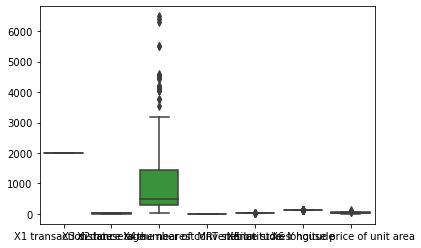

In [11]:
sns.boxplot(data=df1)

<AxesSubplot:>

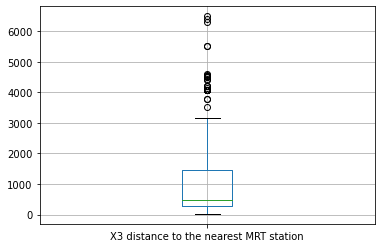

In [12]:
df[['X3 distance to the nearest MRT station']].boxplot()

In [13]:
# boxplot showing some outlier but in actual it may possible so not remove it

## Sepearting x and y

In [14]:
x=df1.drop(columns="Y house price of unit area")
y=df1['Y house price of unit area']

## train test split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## Model training

In [16]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

## testing data evalution

In [17]:
y_pred=knn.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE is :",mse)

rmse=np.sqrt(mse)
print("RMSE is :",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE is :",mae)

r2_value=r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE is : 53.94380722891567
RMSE is : 7.344644799370196
MAE is : 4.890120481927711
R-Squared : 0.6784460575856188


## training data evalution

In [18]:
y_predict=knn.predict(x_train)

mse=mean_squared_error(y_train,y_predict)
print("MSE is :",mse)

rmse=np.sqrt(mse)
print("RMSE is :",rmse)

mae=mean_absolute_error(y_train,y_predict)
print("MAE is :",mae)

r2_value=r2_score(y_train,y_predict)
print("R-Squared :",r2_value)


MSE is : 49.13435045317221
RMSE is : 7.009589891938915
MAE is : 4.761752265861027
R-Squared : 0.7382255664610383


In [19]:
## so model overfit here 

In [20]:
## checking accuracy with linear model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

y_pred=linear_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE is :",mse)

rmse=np.sqrt(mse)
print("RMSE is :",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE is :",mae)

r2_value=r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE is : 54.33118341008418
RMSE is : 7.370968960054315
MAE is : 5.331167609349201
R-Squared : 0.6761369447392902


In [21]:
## accuracy is not good


## Feature scaling

In [22]:
# standardization

In [23]:
std_model=StandardScaler()
array=std_model.fit_transform(x_train)
std_df=pd.DataFrame(array,columns=x_train.columns)
std_df.head(4)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.003819,2.344712,-0.822174,0.968042,-0.143147,0.453778
1,0.299397,-0.825066,0.968002,-0.049170,-0.740870,-1.365644
2,-1.776770,-0.904753,0.933524,-0.388241,-0.501137,-1.437534
3,-0.295320,1.707215,-0.464615,1.307112,0.070038,0.739322


In [24]:
## training accuracy
knn_reg=KNeighborsRegressor(n_neighbors=6,p=2)
knn_reg.fit(std_df,y_train)


y_pred_train=knn_reg.predict(std_df)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE is :",mse)

rmse=np.sqrt(mse)
print("RMSE is :",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE is :",mae)

r2_value=r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE is : 55.549970627727426
RMSE is : 7.453185267234904
MAE is : 4.851913393756294
R-Squared : 0.7040448899789928


In [25]:
## testing
array=std_model.transform(x_test)
std_test_xdf=pd.DataFrame(array,columns=x_test.columns)



y_pred=knn_reg.predict(std_test_xdf)

mse=mean_squared_error(y_test,y_pred)
print("MSE is :",mse)

rmse=np.sqrt(mse)
print("RMSE is :",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE is :",mae)

r2_value=r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE is : 43.063517402945116
RMSE is : 6.562279893676062
MAE is : 4.75281124497992
R-Squared : 0.7433024381022048


Text(0.5, 1.0, 'Comparision Between Train ANd Test Accuracies')

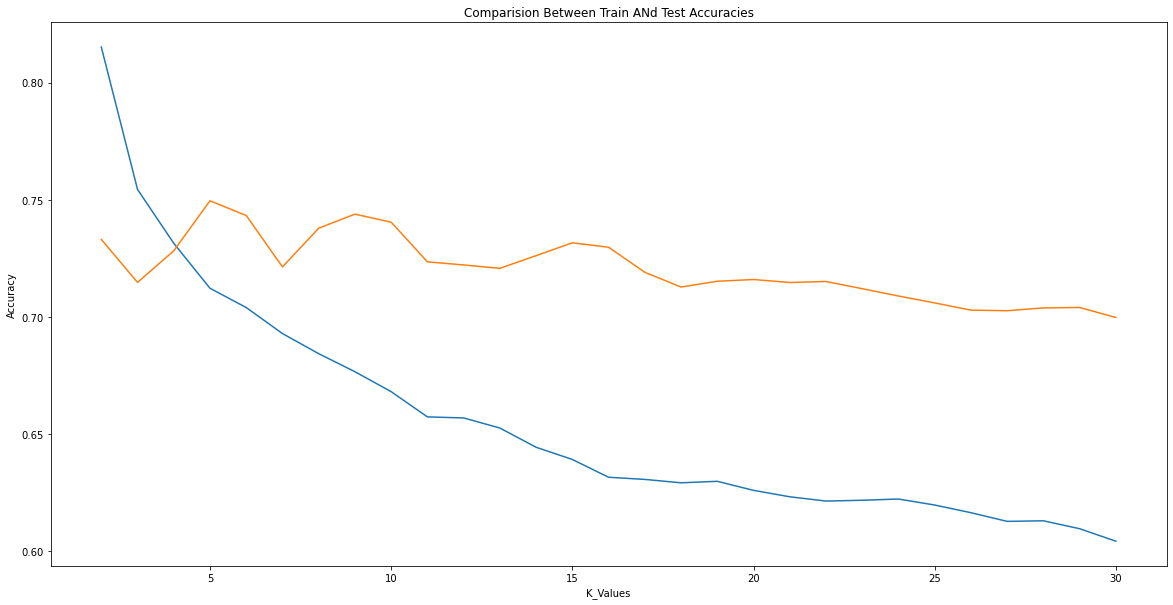

In [26]:
#
r2_train_list= []
r2_test_list = []
k_values=range(2,31)
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_df,y_train)
    r2_train=knn_reg.score(std_df,y_train)
    r2_train_list.append(r2_train)
    
    r2_test=knn_reg.score(std_test_xdf,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K_Values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Train ANd Test Accuracies")

In [27]:
# we keeping some outlier thats why we not go for normalization 
# we will dump without scaled model

## testing on single row

In [28]:
df1.head(1).T

,0
X1 transaction date,2012.91700
X2 house age,32.00000
X3 distance to the nearest MRT station,84.87882
X4 number of convenience stores,10.00000
X5 latitude,24.98298
X6 longitude,121.54024
Y house price of unit area,37.90000


In [29]:
X1transactiondate=2013.67809
X2houseage=23
X3distancetothenearestMRTstation=96.789
X4numberofconveniencestores=8
X5latitude=24.67678
X6longitude=35.80000

In [30]:
array=np.array([X1transactiondate,X2houseage,X3distancetothenearestMRTstation,X4numberofconveniencestores,X5latitude,X6longitude])

In [31]:
prediction=knn.predict([array])[0]
prediction

C:\ANACONDA 64\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


53.0

In [32]:
# so house price will be 53 $  per unit area

In [33]:
with open("real_estate.pkl","wb") as f:
    pickle.dump(knn,f)

In [34]:
json_data={"columns":list(x.columns)}
json_data

{'columns': ['X1 transaction date',
  'X2 house age',
  'X3 distance to the nearest MRT station',
  'X4 number of convenience stores',
  'X5 latitude',
  'X6 longitude']}

In [35]:
with open("json_data.json","w") as f:
    json.dump(json_data,f)